# Machine Learning 2 Project NYX
### Group: Stats ML lead by David Stroud
### Yang Zhang
### 12/18/2020

## Problem Definition
1. Problem Statement
2. Ideal Problem Solution
3. Understanding insight into the problem
4. Technical requirements
## Research
1. Data Structure and source
2. Model architecture
3. Algorithm research
4. Hardware requirements
5. Software requirements
## Model Exploration
1. Establish baselines for model performance
2. Start with a simple model using initial data pipeline
3. Stay nimble and try many parallel (isolated) ideas 
## Model Refinement
1. Perform model-specific optimizations
2. Iteratively debug models as complexity is added


In [5]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# For multiple line outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# read in the csv file
#movieData = pd.read_csv('C:/Users/taniat470s/Desktop/SMU_course/DS7335/Project_NYX/ml-25m/movies.csv') # read in the csv file
movieData = pd.read_csv('C:/Users/taniat470s/Desktop/SMU_course/DS7335/ml-latest-small/movies.csv') # read in the csv file
 
movieData.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
# read in the csv file
#ratingData = pd.read_csv('C:/Users/taniat470s/Desktop/SMU_course/DS7335/Project_NYX/ml-25m/ratings.csv') # read in the csv file
ratingData = pd.read_csv('C:/Users/taniat470s/Desktop/SMU_course/DS7335/ml-latest-small/ratings.csv') # read in the csv file
      
ratingData.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
movieData.shape

(9742, 3)

In [5]:
ratingData.shape

(100836, 4)

In [6]:
ratingData.rating

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: rating, Length: 100836, dtype: float64

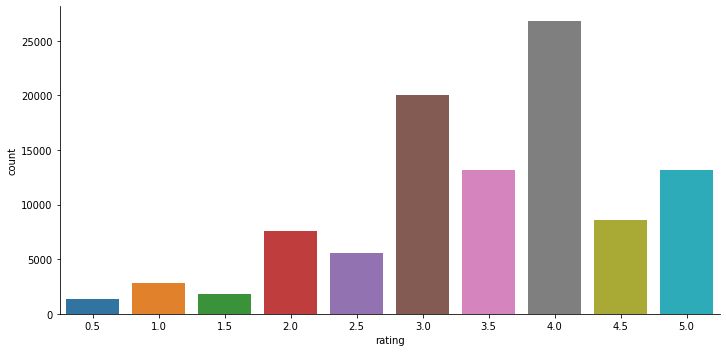

In [8]:
#Distribution of Ratings
sns.factorplot("rating", data=ratingData, aspect=2,
                       kind="count")
plt.show()

In [21]:
# Data Frame of rates and counts
pd.DataFrame(ratingData["rating"].value_counts())

,rating
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791
0.5,1370


In [10]:
pd.DataFrame(movieData.genres.value_counts())

,genres
Drama,1053
Comedy,946
Comedy|Drama,435
Comedy|Romance,363
Drama|Romance,349
...,...
Comedy|Documentary|Drama|Romance,1
Animation|Drama|Sci-Fi|War,1
Crime|Drama|Horror|Mystery|Thriller,1
Comedy|Drama|Fantasy|Sci-Fi,1


In [24]:
ratingData.groupby('userId')[['rating']].median()

,rating
userId,
1,5.0
2,4.0
3,0.5
4,4.0
5,4.0
...,...
606,4.0
607,4.0
608,3.0


In [25]:
ratingData.groupby('movieId')[['rating']].median()

,rating
movieId,
1,4.0
2,3.5
3,3.0
4,3.0
5,3.0
...,...
193581,4.0
193583,3.5
193585,3.5


In [28]:
movie_rating_data = ratingData.groupby('movieId')[['rating']].mean()

In [46]:
movie_rating_data

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
...,...
193581,4.000000
193583,3.500000
193585,3.500000


In [48]:
movieData_copy = movieData
movieData_copy.index = movieData_copy.movieId
movieData_copy

,movieId,title,genres
movieId,,,
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,2,Jumanji (1995),Adventure|Children|Fantasy
3,3,Grumpier Old Men (1995),Comedy|Romance
4,4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
193581,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,193585,Flint (2017),Drama


In [50]:
movieData.shape
movie_rating_data.shape

(9742, 3)

(9724, 1)

In [51]:
movie_merge_data = pd.concat([movieData, movie_rating_data], axis=1, join='inner')
movie_merge_data.shape

(9724, 4)

In [52]:
movie_merge_data

,movieId,title,genres,rating
movieId,,,,
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
2,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
3,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
4,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
5,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
193581,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
193583,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
193585,193585,Flint (2017),Drama,3.500000


In [12]:
ratingData[['userId','movieId']]

,userId,movieId
0,1,1
1,1,3
2,1,6
3,1,47
4,1,50
...,...,...
100831,610,166534
100832,610,168248
100833,610,168250
100834,610,168252


In [7]:
#ratingData_inputs = ratingData[['userId','movieId','timestamp']]
ratingData_inputs = ratingData[['userId','movieId']]

In [8]:
# Using ShuffleSplit for Training/Testing Split 
from sklearn.model_selection import ShuffleSplit
# set seed
np.random.seed(17)

num_cv_iterations = 3
num_instances = len(ratingData)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [9]:
ratingData['rating'] = ratingData['rating'].astype('category')

In [10]:
# Split X and Y into Training and Testing dataset
for train_indices, test_indices in cv_object.split(ratingData_inputs,ratingData.rating): 

    Xsel_train = ratingData_inputs.values[train_indices]
    ysel_train = ratingData.rating[train_indices]
    
    Xsel_test = ratingData_inputs.values[test_indices]
    ysel_test = ratingData.rating[test_indices]

### Logistic Regression

In [12]:
#  Logistic regression fit with the original dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [13]:
from sklearn import preprocessing
from sklearn import utils

In [14]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(ysel_train)

In [15]:
lr_model.fit(Xsel_train, encoded)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
encoded_test = lab_enc.fit_transform(ysel_test)

In [19]:
pred = lr_model.predict(Xsel_test)

accuracy_score(encoded_test, pred)

0.2615033716779056

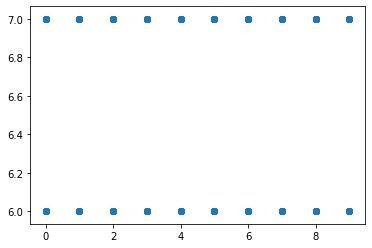

In [20]:
plt.scatter(encoded_test,pred)
plt.show()

### Random Forest

In [39]:
# Random Forest apply to X with all variables
from sklearn.ensemble import RandomForestClassifier
clfa=RandomForestClassifier(n_estimators=100)
clfa.fit(Xsel_train, encoded)
y_pred=clfa.predict(Xsel_test)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

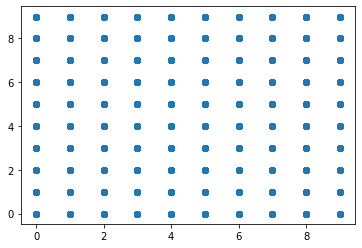

In [42]:
plt.scatter(encoded_test,y_pred)
plt.show()

In [43]:
accuracy_score(encoded_test, y_pred)

0.30910353034510113

### Plotting and EDA

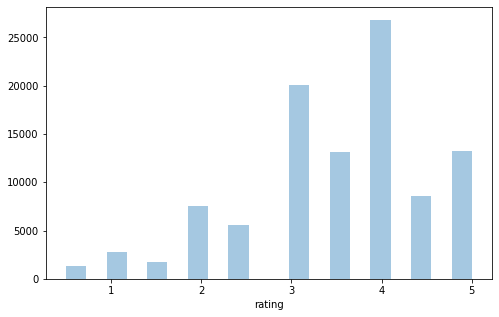

In [93]:
f, ax = plt.subplots(figsize=(8, 5))
sns.distplot(ratingData["rating"], bins=20, kde=False,ax=ax)
plt.show()

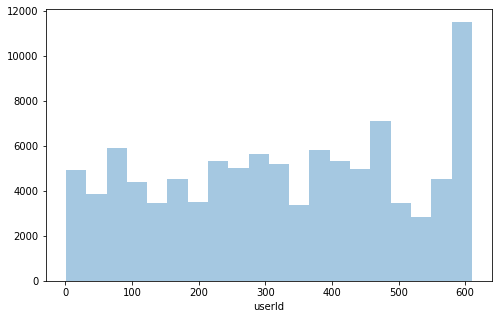

In [94]:
f, ax = plt.subplots(figsize=(8, 5))
sns.distplot(ratingData["userId"], bins=20, kde=False,ax=ax)
plt.show()

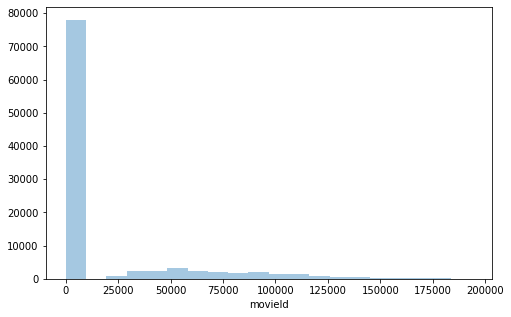

In [95]:
f, ax = plt.subplots(figsize=(8, 5))
sns.distplot(ratingData["movieId"], bins=20, kde=False,ax=ax)
plt.show()

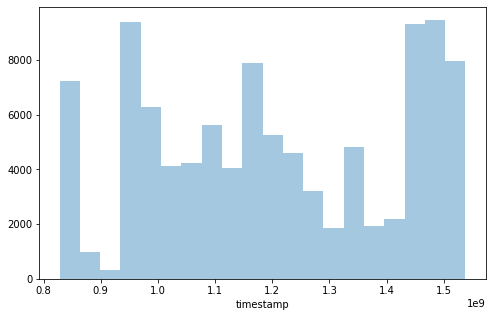

In [96]:
f, ax = plt.subplots(figsize=(8, 5))
sns.distplot(ratingData["timestamp"], bins=20, kde=False,ax=ax)
plt.show()